In [195]:
from skimage.data import coins
import matplotlib.pyplot as plt
from skimage.transform import hough_circle_peaks, hough_circle
from skimage.filters import sobel
import numpy as np
from skimage.morphology import binary_opening, binary_closing, disk
from skimage import color, exposure
from skimage.draw import circle_perimeter 
import cv2
from skimage import io

from math import sin, cos, radians, trunc

In [196]:
def RemoveRedCells(img):
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    # Pegando os limites inferiores e superiores das células vermelhas
    lower_red = np.array([80, 13, 160])
    upper_red = np.array([150, 50, 200])

    # Máscara contendo range (no canal hsv) que as células vermelhas se encontram
    mask = cv2.inRange(hsv, lower_red, upper_red)

    # Agora, "limpa" os ruídos mínimos pretos e brancos que estão na imagem
    kernel = np.ones((12,12),np.uint8)
    # mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
    # mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)

   

    # Segmentanto as células vermelhas, só elas irão aparecer
    result = cv2.bitwise_and(img, img, mask=mask)


    return result

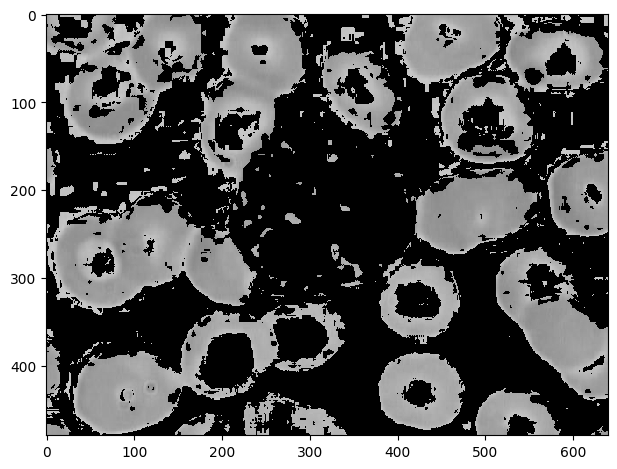

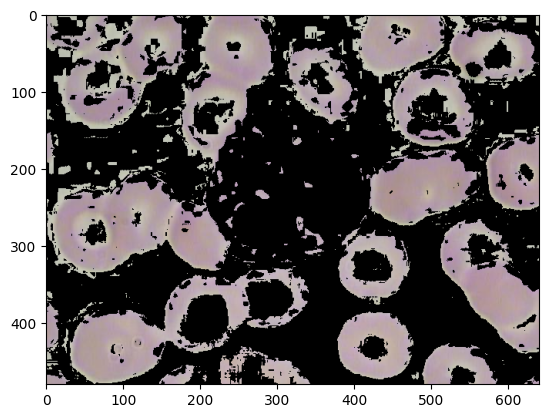

In [197]:
nome_image = 'BloodImage_00339.jpg'

image_color = RemoveRedCells(io.imread(nome_image))



image_gray =  (color.rgb2gray(image_color)*255).astype('uint8')

img=image_gray
red_channel = image_color[:, :, 0]
green_channel = image_color[:, :, 1]



blue_channel = image_color[:, :, 2]

image_gray = green_channel 

# Mostrar os canais individualmente
io.imshow(image_gray)
io.show()

plt.imshow(image_color)



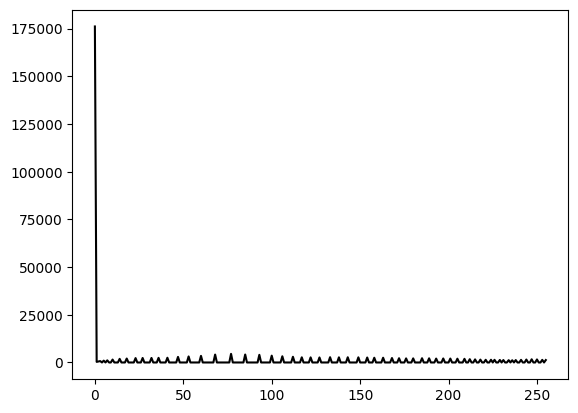

In [198]:
image_gray = exposure.equalize_hist(image_gray)

h = np.histogram (image_gray.ravel(),bins=256)
plt.plot (h[0],'-k')

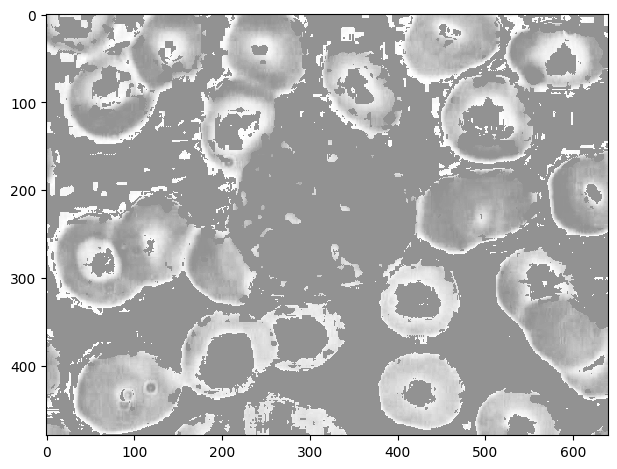

In [199]:
io.imshow(image_gray)
io.show()

0.5859375


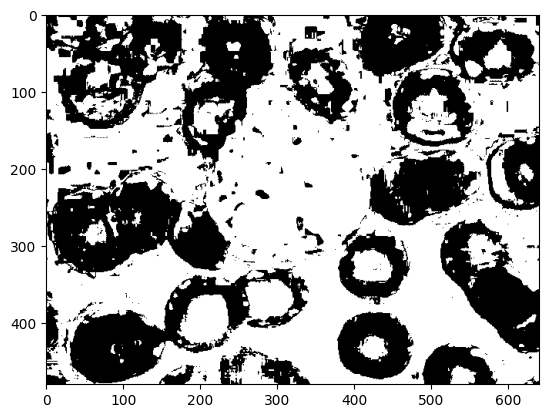

In [200]:
binary=image_gray.copy()
limiar = image_gray.max()*(150/256)

print(limiar)
binary[binary<=limiar]=0
binary[binary > 0]=1


plt.imshow((255- binary*255),cmap='gray')

In [201]:
binary = 255- binary * 255

selem = disk(3)

print(selem)

binary = binary_opening (binary, selem)
binary = binary_closing (binary, selem)


kernel = selem
binary_eroded = cv2.erode(binary.astype(np.uint8), kernel, iterations=1)



[[0 0 0 1 0 0 0]
 [0 1 1 1 1 1 0]
 [0 1 1 1 1 1 0]
 [1 1 1 1 1 1 1]
 [0 1 1 1 1 1 0]
 [0 1 1 1 1 1 0]
 [0 0 0 1 0 0 0]]


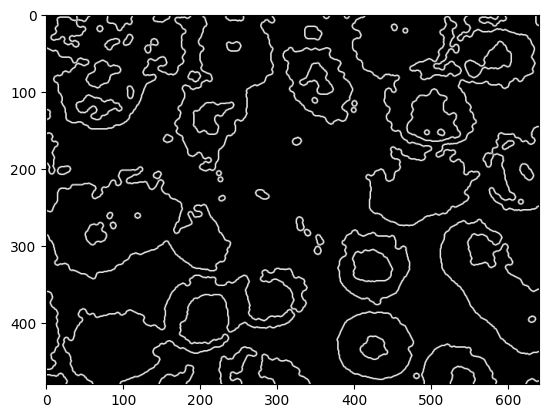

In [202]:
edges = sobel (binary)
plt.imshow(edges,cmap='gray')

[43 42 30 44 34 31 31 43 48 33 42 30 36 43 31 32 31 45 45 30 34 46 44 44
 30 46 41 37 48 43 32 32 38 44 46 41 42 31 44 47 45 33 44 32 31 31 53 47
 35 44 31 31 34 49 53 31 32 47 33 33 35 35 38 43 40 48 41 42 33 43 43 35
 34 40 32 32 31 37 37 35 35 30 46 41 31 32 32 31 43 43 44 33 34 59 53 47
 42 36 54 31] 100


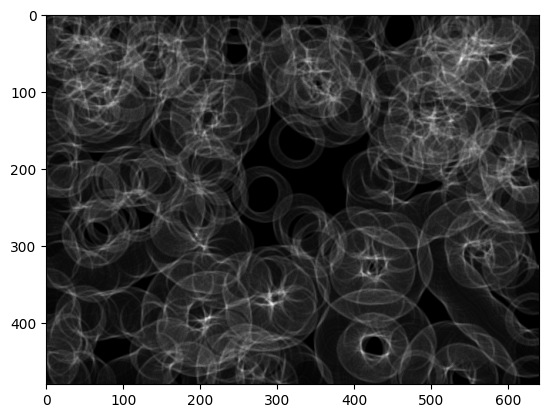

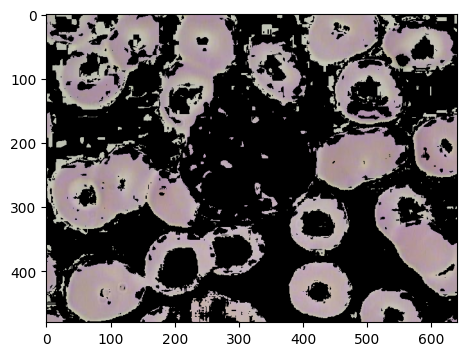

In [203]:
raios = np.arange (30,65,1)
hough_grade = hough_circle (edges, raios)



plt.imshow (hough_grade[0], cmap='gray')






def plot_lines_to_image(image,a, b, raio):
    _, ax = plt.subplots(ncols=1, nrows=1, figsize=(10, 4))
    image_color = color.gray2rgb(image)

    centers = []
    for center_y, center_x, radius in zip(b, a, raio):
        circy, circx = circle_perimeter(center_y, center_x, radius,
        shape=image.shape)

        centers.append(center_x)
        centers.append(center_y)
        
        image_color[circy, circx] = (220, 100, 100)
        ax.imshow(image_color, cmap=plt.cm.gray)



acumuladores, a, b, raio = hough_circle_peaks (hough_grade, raios, total_num_peaks=100)

print(raio, len(raio))

plot_lines_to_image( img, a, b, raios)

binary_uint8 = binary.astype(np.uint8) * 255


edges = cv2.Sobel(binary_uint8, cv2.CV_8U, 2, 2, ksize=5)  # Aqui estamos assumindo que a binarização já foi realizada e 'binary' é a imagem binarizada
plt.imshow(edges,cmap='gray')



circles = cv2.HoughCircles(edges,cv2.HOUGH_GRADIENT,1, 60,
                             param1=50,param2=20,minRadius=30,maxRadius=80)
    
white_cells_count = 0

circles = np.uint32(np.around(circles))
for i in circles[0,:]:
    cv2.circle(img,(i[0],i[1]),i[2],(0,255,0),2)
    cv2.circle(img,(i[0],i[1]),2,(0,0,255),3)

    white_cells_count +=1

plt.imshow(image_color,cmap='gray')


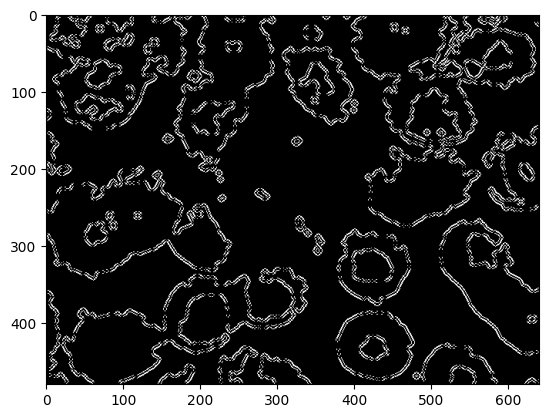

In [204]:
plt.imshow(edges,cmap='gray')

olhar hsv ou hsi e olhar para o canal h qual a faixa associada a hemacia.